In [1]:
import re, pandas as pd
#import sys, os
import json
#import time
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
from pprint import pprint
from scrape_data import *

In [ ]:
#get_data('data scientist', 10, location='Toronto')

In [2]:
def load_data(file_name):
    """
    Open the saved json data file and load the data into a dict.
    
    Parameters:
        file_name: the saved file name, e.g. "machine_learning_engineer.json"
    
    Returns:
        postings_dict: data in dict format   
    
    """

    with open(file_name, 'r') as f:
        postings_dict = json.load(f)
        return postings_dict

In [3]:
def make_text_list(postings_dict, first_n_postings=100):
    """
    Extract the texts from postings_dict into a list of strings
    
    Parameters:
        postings_dict:  
        first_n_postings:  
    
    Returns:
        text_list: list of job posting texts
    
    """
    
    text_list = []
    for i in range(0, first_n_postings+1):
        text_list.append(postings_dict[str(i)]['posting'])
    
    return text_list

In [63]:
def nltk_process(text, to_set):
    """
    Tokenize, stem and remove stop words for the given text
    
    Parameters:
        text: a text string
    
    Returns:
        token_list: the processed text as a list of tokens
    """
    from nltk import word_tokenize
    from nltk.corpus import stopwords 
    from nltk.stem.snowball import SnowballStemmer
    
    stop_words = set(stopwords.words('english')) 
    stemmer = SnowballStemmer("english")
    
    tokens = word_tokenize(text)
    tokens_stemmed = [stemmer.stem(i) for i in tokens]
    tokens_stemmed_nostop = [word for word in tokens_stemmed if word not in stop_words]
    
    if to_set:
        tokens_stemmed_nostop = set(tokens_stemmed_nostop)
    
    return tokens_stemmed_nostop   

In [65]:
def clean_text(text_list, to_set=True):
    """
    Clean the text so that all words are root...
    
    Parameters:
        text_list -- list of job posting strings
        
    Returns:
        cleaned_text -- a text string for the wc plot
    """
    # Split the text based on slash, space and newline, then take set     
    #text = [set(re.split('/| |\n|', i)) for i in text]
    #text = [set(re.split('\W', i)) for i in text_list]
    
    text_list_processed = [nltk_process(text=i, to_set=to_set) for i in text_list]
    
    cleaned_text = []
    for i in text_list_processed:
        cleaned_text += list(i)
    cleaned_text = ' '.join(cleaned_text)
    
    return cleaned_text   

In [5]:
def plot_wc(text, max_words=200, stopwords_list=[], to_file_name=None):
    """
    Make a word cloud plot using the given text.
    
    Parameters:
        text -- the text as a string
    
    Returns:
        None    
    """
    wordcloud = WordCloud().generate(text)
    stopwords = set(STOPWORDS)
    stopwords.update(stopwords_list)

    wordcloud = WordCloud(background_color='white',
                         stopwords=stopwords,
                         #prefer_horizontal=1,
                         max_words=max_words, 
                         min_font_size=6,
                         scale=1,
                         width = 800, height = 800, 
                         random_state=8).generate(text)
    plt.figure(figsize=[16,16])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    if to_file_name:
        to_file_name = to_file_name + ".png"
        wordcloud.to_file(to_file_name)

In [6]:
data = load_data('data_scientist.json')

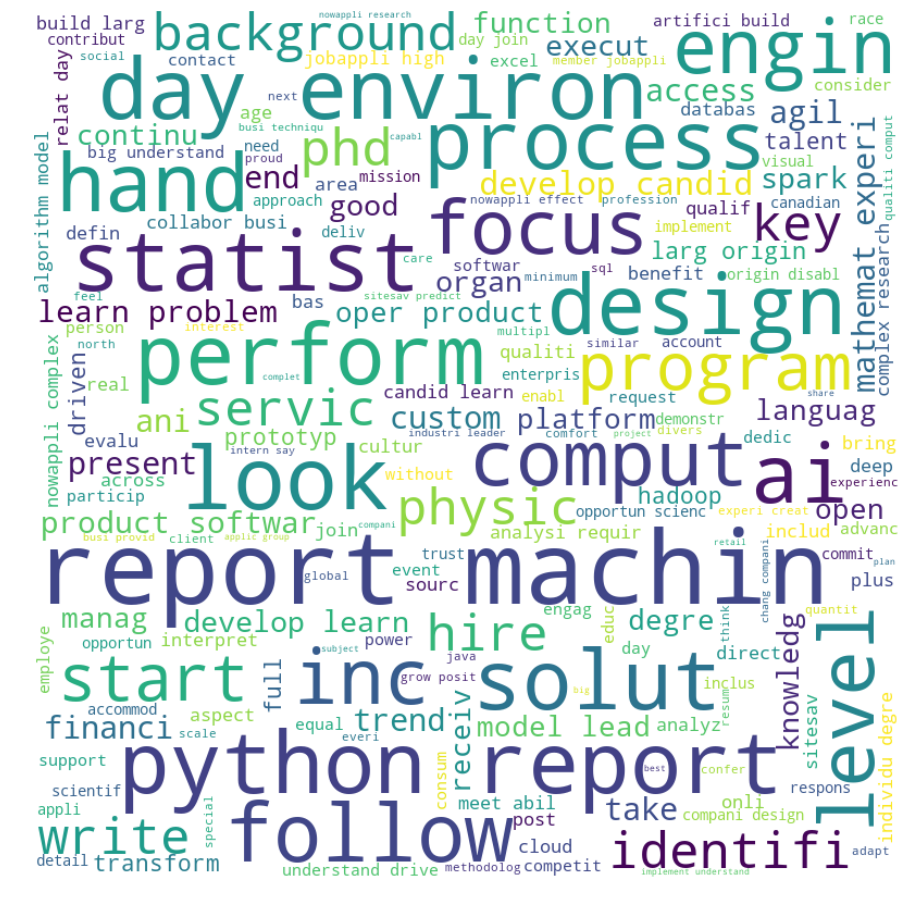

In [66]:
text_list = make_text_list(data, first_n_postings=100)
cleaned_text = clean_text(text_list, to_set=True)
plot_wc(cleaned_text, stopwords_list=stopwords_list, to_file_name='data_scientist_wc')

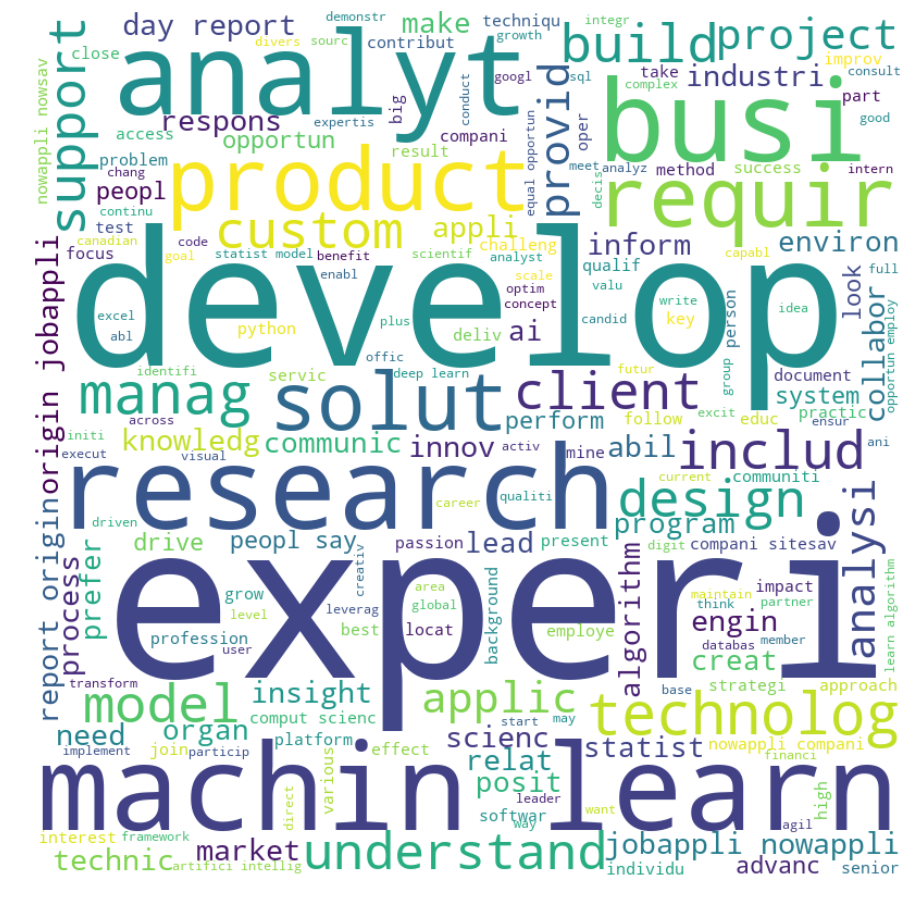

In [67]:
text_list = make_text_list(data, first_n_postings=100)
cleaned_text = clean_text(text_list, to_set=False)
plot_wc(cleaned_text, stopwords_list=stopwords_list, to_file_name='data_scientist_wc')

In [7]:
stopwords_list = ['accommodation', 'ago', 'applicant', 'application', 'asset', 'based', 'canada', 'candidate', 'company', 
                  'data', 
                  'days', 'education', 'employee', 'employer', 'ensure', 'environment', 'et', 'etc', 'experience', 'field', 
                  'help',
                  'including', 'job', 'jobapply', 'life', 'location', 'microsoft', 'new', 'nowapply', 'nowsave', 'offer',
                  'office', 
                  'one', 'preferred', 'people', 'position', 'professional', 'qualifications', 'related', 'required', 
                  'requirement', 
                  'requirements', 'resume', 
                  'review', 'reviews', 'reviewsread', 'role', 'save', 'saying', 'science', 'scientist', 'self', 'set',
                  'service', 
                  'sitesave', 
                  'skill', 'skills', 'strong', 'team', 'time', 'tool', 'toronto', 'type', 'understanding', 'us', 'use',
                  'well',
                  'will', 'within',
                  'work', 'working', 'world', 'year', 'yearsjobapply']
stopwords_list

['accommodation',
 'ago',
 'applicant',
 'application',
 'asset',
 'based',
 'canada',
 'candidate',
 'company',
 'data',
 'days',
 'education',
 'employee',
 'employer',
 'ensure',
 'environment',
 'et',
 'etc',
 'experience',
 'field',
 'help',
 'including',
 'job',
 'jobapply',
 'life',
 'location',
 'microsoft',
 'new',
 'nowapply',
 'nowsave',
 'offer',
 'office',
 'one',
 'preferred',
 'people',
 'position',
 'professional',
 'qualifications',
 'related',
 'required',
 'requirement',
 'requirements',
 'resume',
 'review',
 'reviews',
 'reviewsread',
 'role',
 'save',
 'saying',
 'science',
 'scientist',
 'self',
 'set',
 'service',
 'sitesave',
 'skill',
 'skills',
 'strong',
 'team',
 'time',
 'tool',
 'toronto',
 'type',
 'understanding',
 'us',
 'use',
 'well',
 'will',
 'within',
 'work',
 'working',
 'world',
 'year',
 'yearsjobapply']

## Todo's
- stemming etc.
- docstring and comments
- OOP
- add progress update text
- single responsiblity principle for functions